# Auto-outliers fusion technique

In [6]:
# necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# encoding and using auto-outlier detection techniques
## automatic outlier detection 
from sklearn.ensemble import IsolationForest 
from sklearn.covariance import EllipticEnvelope 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [8]:
model_collect = {'0': IsolationForest(contamination=0.1),
                '1': EllipticEnvelope(contamination=0.01),
                '2': LocalOutlierFactor(),
                '3': OneClassSVM(nu=0.01)}

In [14]:
data = pd.read_csv("outliers.csv")
data

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,58,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000002_000.png,81,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,00000003_000.png,81,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,00000003_001.png,74,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,00000003_002.png,75,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90997,00030801_000.png,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90998,00030802_000.png,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90999,00030803_000.png,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
91000,00030804_000.png,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
from collections import Counter
def auto_outlier_fusion(model_collect, data):
    # auto-outliers
    model1 = model_collect['0']
    model2 = model_collect['1']
    model3 = model_collect['2']
    model4 = model_collect['3']
    # stats-outliers
    Q1 = np.quantile(data["Patient Age"],0.25,interpolation='lower')
    Q3 = np.quantile(data["Patient Age"],0.75,interpolation='higher')
    iqr = Q3 - Q1
    # criterions
    yhat1 = model1.fit_predict(data)
    yhat2 = model2.fit_predict(data)
    yhat3 = model3.fit_predict(data)
    yhat4 = model4.fit_predict(data)
    # list of index
    higher_idx = list(data[data["Patient Age"]< Q3 + 1.5*iqr].index)
    lower_idx = list(data[data["Patient Age"]> Q1 - 1.5*iqr].index)
    model1_idx = list(data[yhat1 == -1].index)
    model2_idx = list(data[yhat2 == -1].index)
    model3_idx = list(data[yhat3 == -1].index)
    model4_idx = list(data[yhat4 == -1].index)
    # get the index for potential outliers (values >= 3 out of 5 ways)
    higher_idx.extend(lower_idx)
    higher_idx.extend(model1_idx)
    higher_idx.extend(model2_idx)
    higher_idx.extend(model3_idx)
    higher_idx.extend(model4_idx)
    total_idx_collect = higher_idx
    all_idx = dict(Counter(total_idx_collect))
    
    outlier_idx = []
    for key, value in all_idx.items():
        if value >= 3:
            outlier_idx.append(key)
            
    return outlier_idx

In [17]:
outliers = auto_outlier_fusion(model_collect, data.iloc[:, 1:3])

E:\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
len(outliers)

9847

In [20]:
data.drop(data["Patient Age"].index[outliers], inplace=True)
data.index = range(len(data.index))

In [21]:
data

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,58,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000005_000.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,00000005_001.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,00000005_002.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,00000005_003.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81150,00030801_000.png,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
81151,00030802_000.png,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
81152,00030803_000.png,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
81153,00030804_000.png,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
# create the new column for all 14 categorical diseases 
targets_val = []
for i in range(len(data)):
    for j in range(3,17):
        if data.iloc[i,j] == 1:
            targets_val.append(data.columns[j])

In [23]:
data.targets = 0
data["Targets"] = targets_val
data

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding,Targets
0,00000001_000.png,58,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Cardiomegaly
1,00000005_000.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
2,00000005_001.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
3,00000005_002.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
4,00000005_003.png,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81150,00030801_000.png,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
81151,00030802_000.png,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
81152,00030803_000.png,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding
81153,00030804_000.png,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No Finding


In [ ]:
data.to_csv("clean_set.csv", index=False)

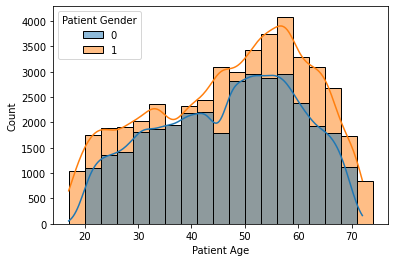

In [24]:
sns.histplot(data=data, x="Patient Age", binwidth=3, kde=True, hue="Patient Gender");

In [25]:
(data["Patient Gender"] == 1).sum(), (data["Patient Gender"] == 0).sum()

(46662, 34493)

In [26]:
data.iloc[:,3:].sum()

Atelectasis                                                        3795
Cardiomegaly                                                        951
Effusion                                                           3503
Infiltration                                                       8472
Mass                                                               1958
Nodule                                                             2497
Pneumothorax                                                       1941
Consolidation                                                      1113
Edema                                                               589
Emphysema                                                           745
Fibrosis                                                            637
Pleural_Thickening                                                  999
Hernia                                                               80
No Finding                                                      

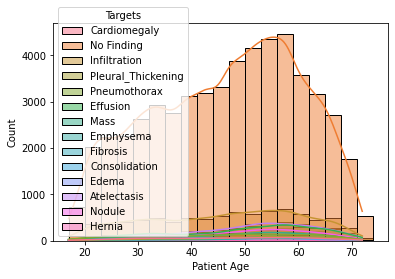

In [27]:
sns.histplot(data=data, x="Patient Age", binwidth=3, kde=True, hue="Targets");

In [28]:
# female versus male in bar plot for different diseases
## create pivot table
df2 = data.drop(["Patient Age", "Image Index"], axis=1)
#df2.pivot_table(columns=["Patient Gender"], index=["Targets"], aggfunc=np.sum)
pv = df2.pivot_table(index=["Patient Gender"], aggfunc=np.sum)
pv

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumothorax
Patient Gender,,,,,,,,,,,,,,
0,1389,506,434,278,1547,243,295,46,3566,741,22913,1068,406,1061
1,2406,445,679,311,1956,502,342,34,4906,1217,30962,1429,593,880


In [29]:
pv1 = df2.pivot_table(columns=["Patient Gender"], aggfunc=np.sum)
pv1

Patient Gender,0,1
Atelectasis,1389,2406
Cardiomegaly,506,445
Consolidation,434,679
Edema,278,311
Effusion,1547,1956
Emphysema,243,502
Fibrosis,295,342
Hernia,46,34
Infiltration,3566,4906
Mass,741,1217


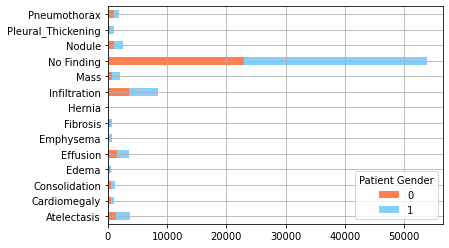

In [30]:
pv1.plot(kind= 'barh', stacked=True, color=['coral','lightskyblue'])
plt.grid();

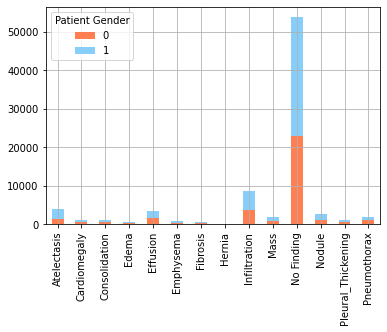

In [31]:
pv1.plot(kind= 'bar', stacked=True, color=['coral','lightskyblue']);
plt.grid();

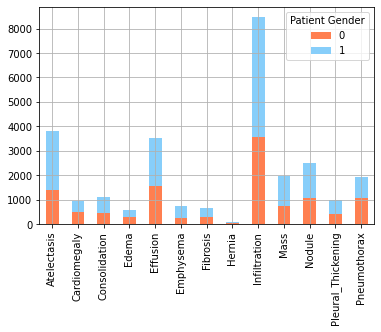

In [32]:
pv2 = pv1.drop("No Finding", axis=0)
pv2.plot(kind= 'bar', stacked=True, color=['coral','lightskyblue'])
plt.grid();

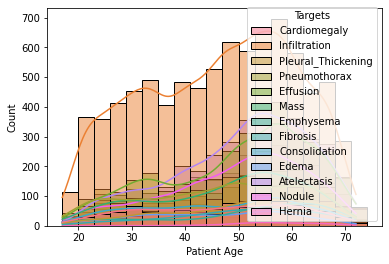

In [33]:
sns.histplot(data=data[data["Targets"] != "No Finding"], x="Patient Age", binwidth=3, kde=True, hue="Targets");

In [57]:
# correlation among age, gender, and diseases
df1 = data.replace(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening',
       'Pneumothorax'],[i for i in range(14)])
df1

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding,Targets
0,00000001_000.png,58,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,00000002_000.png,81,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10
2,00000003_000.png,81,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
3,00000003_001.png,74,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
4,00000003_002.png,75,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89891,00030801_000.png,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10
89892,00030802_000.png,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10
89893,00030803_000.png,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10
89894,00030804_000.png,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10


In [36]:
# correlation between gender and age with different diseases
grab_df = data[["Patient Age", "Patient Gender", "Targets"]] 

for i in np.unique(grab_df.Targets):
    corr_data = grab_df[grab_df.Targets == i]
    print(i)
    print(corr_data.corr())

Atelectasis
                Patient Age  Patient Gender
Patient Age        1.000000        0.030307
Patient Gender     0.030307        1.000000
Cardiomegaly
                Patient Age  Patient Gender
Patient Age        1.000000       -0.042156
Patient Gender    -0.042156        1.000000
Consolidation
                Patient Age  Patient Gender
Patient Age         1.00000         0.04155
Patient Gender      0.04155         1.00000
Edema
                Patient Age  Patient Gender
Patient Age        1.000000        0.008647
Patient Gender     0.008647        1.000000
Effusion
                Patient Age  Patient Gender
Patient Age        1.000000        0.038859
Patient Gender     0.038859        1.000000
Emphysema
                Patient Age  Patient Gender
Patient Age        1.000000        0.080489
Patient Gender     0.080489        1.000000
Fibrosis
                Patient Age  Patient Gender
Patient Age        1.000000       -0.056588
Patient Gender    -0.056588        1.000000
Her

# Preprocessing xray images

In [25]:
from pathlib import Path
import cv2
from tqdm.notebook import tqdm

In [26]:
# get the root path of the images
root_path = Path("D:Research/Chest_xray/images")

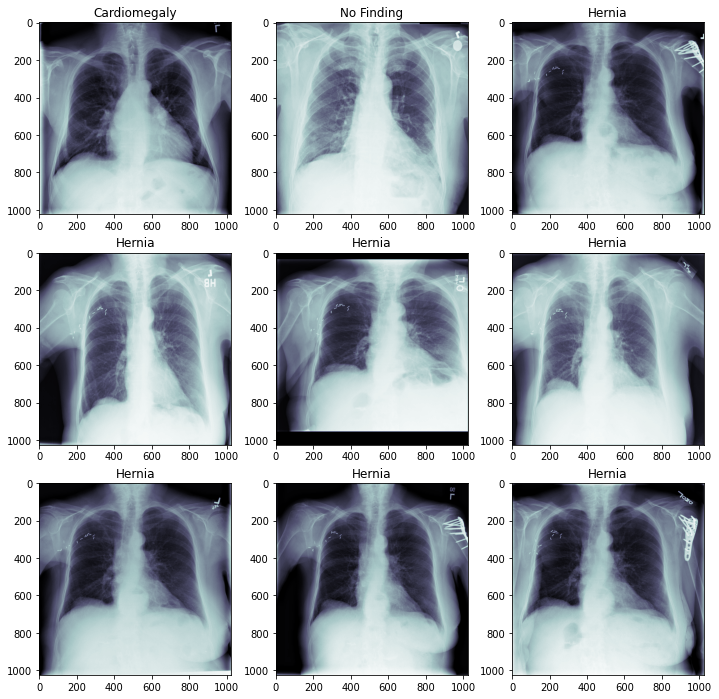

In [138]:
# get example images 
fig, axis = plt.subplots(3,3, figsize=(12,12))
c = 0
for i in range(3):
    for j in range(3):
        # get the image 
        image_idx = data["Image Index"].iloc[c]
        get_path = root_path/image_idx
        axis[i][j].imshow(plt.imread(get_path), cmap="bone")
        axis[i][j].set_title(df1["Targets"].iloc[c])
        c += 1

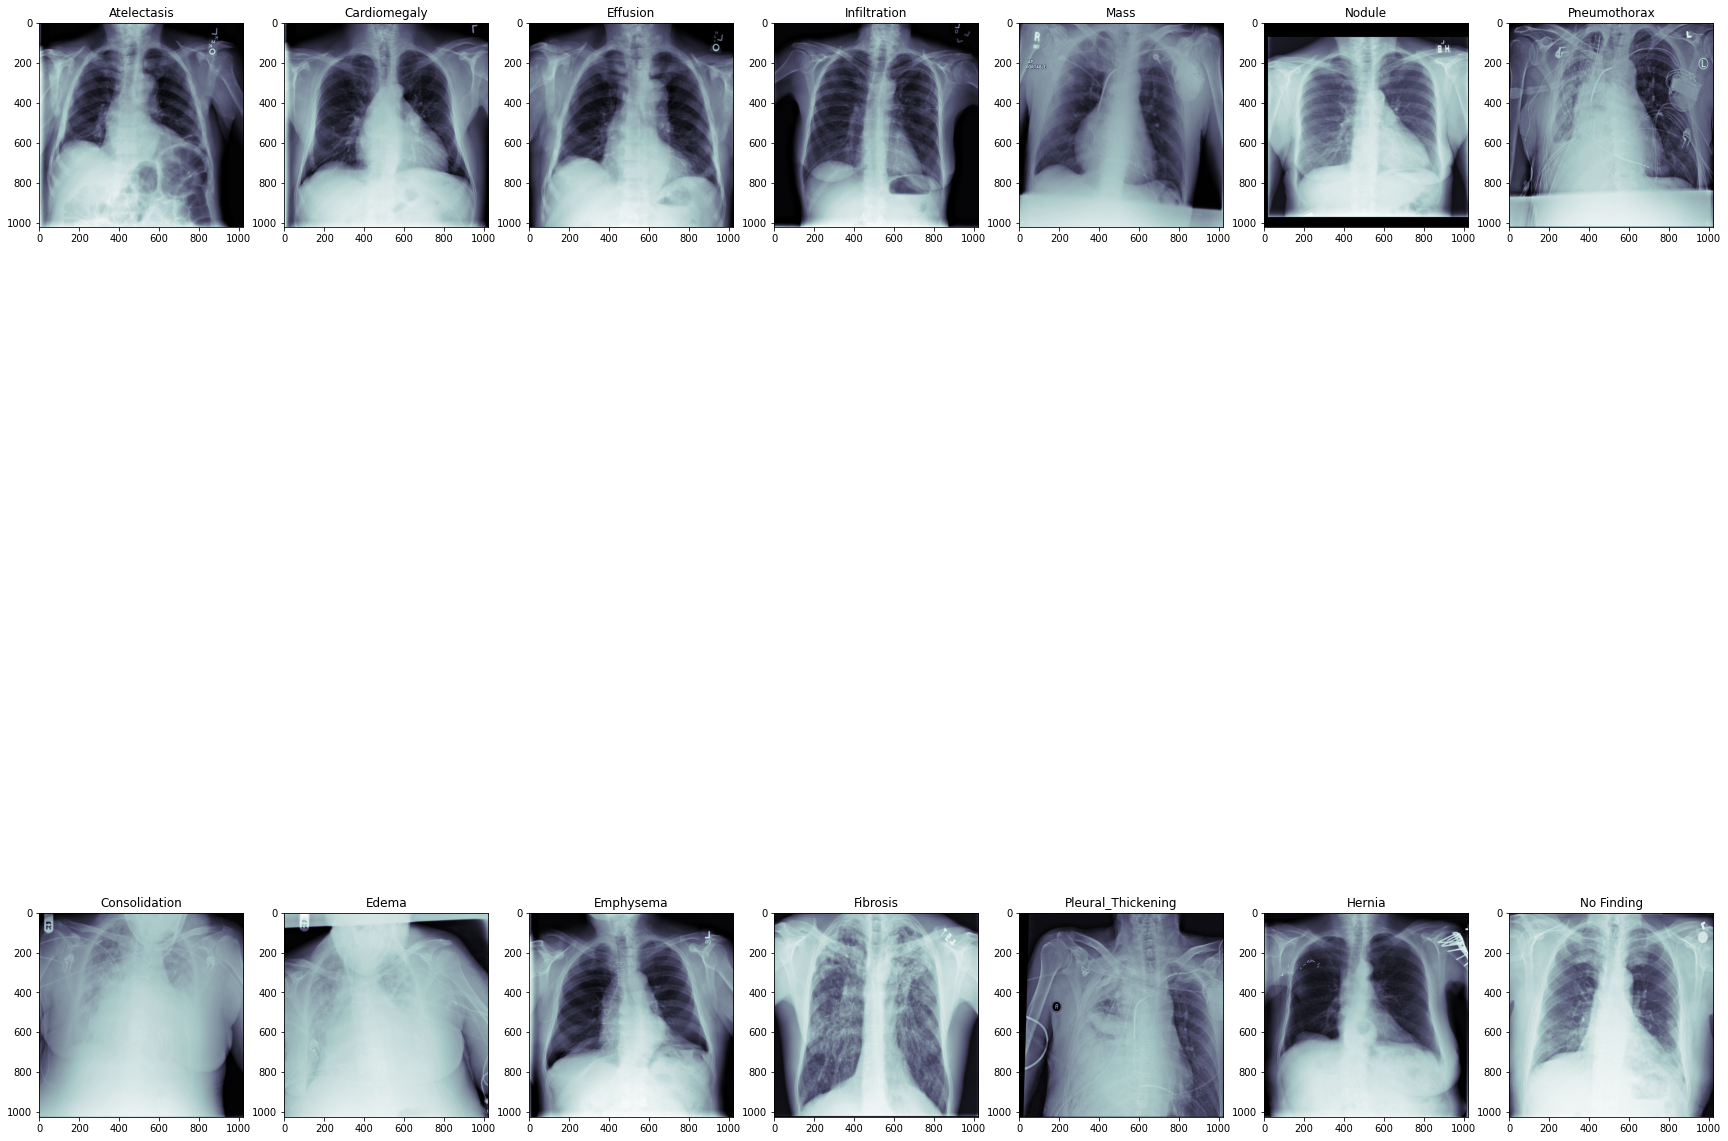

In [169]:
# examples for all 14 categories
fig, axis = plt.subplots(2,7, figsize=(30,30))

c = 0
for i in range(2):
    for j in range(7):
        get_path = root_path/data["Image Index"].loc[ex_imgs[c]]
        target = data["Targets"].loc[ex_imgs[c]]
        axis[i][j].imshow(plt.imread(get_path), cmap="bone")
        axis[i][j].set_title(target)
        c += 1

In [39]:
np.unique(data.Targets)

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening',
       'Pneumothorax'], dtype=object)

In [32]:
##  preprocess the data
sums, sums_square = 0, 0

for i, img_id in enumerate(tqdm(data["Image Index"])):
    # get the path of images
    img_path = root_path/img_id
    img = plt.imread(img_path)/ 255 # standardization
    
    # some of images are RGBA: Convert RGBA into RGB
    if len(img.shape) > 2:
        img = plt.imread(img_path)[:,:,3]/ 255
    
    # resize 1024 by 1024 into the smaller size
    img_array = cv2.resize(img, (224, 224)).astype(np.float16)
    label = data.Targets.iloc[i]
    
    # seperate train and validation (80% train, and 20% validation)
    train_or_val = "train" if i < int(np.ceil(len(data) * 0.8)) else "val"
    save_path = Path("D:/Research/Outliers")
    current_save_path = save_path/train_or_val/str(label)
    # make sure and create the save path
    current_save_path.mkdir(parents=True, exist_ok=True) 
    np.save(current_save_path/img_id, img_array)
    
    # use normalization for training set
    normalizer = img_array.shape[0] * img_array.shape[1]  # Normalize sum of image
    if train_or_val == "train":
        sums += np.sum(img_array) / normalizer
        sums_square += (img_array **2).sum() /normalizer

  0%|          | 0/91002 [00:00<?, ?it/s]

In [22]:
# get the mean and  std
mean = sums/int(np.ceil(len(df) * 0.8)) # number of images in our tain data
std = np.sqrt(sums_square/int(np.ceil(len(df) * 0.8)) - (mean ** 2))
mean, std

(0.0020173964623196455, 0.000992666351121776)